In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data_baishe = pd.read_csv('../douban_data/baishe_comment.csv',header=None)

In [5]:
data_baishe.columns=['点赞数','用户名','评分','点评时间','短评']

In [6]:
data_baishe.head()

,点赞数,用户名,评分,点评时间,短评
0,2640,搬砖侠,3,2019-01-10,中美合拍的《新白娘子前传》，在脍炙人口的经典传说的基础上，加入了更具有现代感的改编，故事拉回...
1,1953,凌睿,3,2019-01-09,捕蛇村红叶似火、风景如画，村外崇山峻岭、层林尽染，永州城流光溢彩、灯火辉煌。\n水墨风非常惊...
2,1779,女神的秋裤,4,2019-01-05,2019年的第一份国产惊喜，超出预期，虽然还有人物表情动作略显僵硬的通病，但已经比《风语咒》...
3,1341,沧海一小生,4,2019-01-11,画面处理让人惊艳，那些如画风景栩栩如生、那些打斗的场面也是细腻、水平颇高；影片源于古老的故事...
4,575,嘟嘟熊之父,1,2019-01-08,已阵亡。这精虫上脑腻腻歪歪的爱情太令人作呕了，谁看谁瞎。你说你画风搞那么精致有啥用？请个合格...


In [66]:
data_baishe.shape[0]

215

In [2]:
from wordcloud import WordCloud
import seaborn as sns
import jieba

In [9]:
data_baishe['短评'].shape

(215,)

In [13]:
# 短评列表
content_list =  data_baishe['短评'].values.tolist()
content_list

['中美合拍的《新白娘子前传》，在脍炙人口的经典传说的基础上，加入了更具有现代感的改编，故事拉回到了五百年前，真正做到了文体两开花。中国风的场景挺精致，并且颠覆了此前追光动画作品的低幼属性，主打成人向，无论是画风还是影片中的“一夜情”桥段都相当少儿不宜，另外还有向徐克版《青蛇》和剧版《白娘子》致敬的地方，但缺点依然很明显，剧情转折相当突兀，很不连贯，而且追光动画确实在角色建模和面部表情设计上几乎毫无进步，角色一水儿的面瘫和网红锥子脸，可惜了',
 '捕蛇村红叶似火、风景如画，村外崇山峻岭、层林尽染，永州城流光溢彩、灯火辉煌。\n水墨风非常惊艳，漫天蒲公英无比浪漫，纸人军团极致震撼，动作戏让人瞠目结舌。\n小白最仙女，小青最妖娆，狐妖最邪魅，蛇母最霸气，个个风华绝代，英姿飒爽，国漫（严格的说是合拍）终于不再玛丽苏、傻白甜。\n“人间多的是长了两只脚的恶人，长了条尾巴又怎么样”最深刻；\n“我的法力都被吸光了”“这下你再也推不开我了”最催泪。\n片尾又和《白蛇传》的民间传说无缝衔接，解释了白素贞和许仙一见钟情的原因，小狗“肚兜”也修足福分，转世为人，成为许仙的姐夫。\n美术登峰造极，画面美不胜收，缺点在于剧情比较简单，节奏略显沉闷，总体称得上“优秀”二字。\n今年年初，中美合拍的《白蛇：缘起》即将正式上映，文体两开花，弘扬中华文化，希望大家多多关注。',
 '2019年的第一份国产惊喜，超出预期，虽然还有人物表情动作略显僵硬的通病，但已经比《风语咒》要好，而且画面精美，构图讲究，中国风终于不再是素材的堆砌，而是拍出了古典韵味，实在难得，诚意作品，也有水平。',
 '画面处理让人惊艳，那些如画风景栩栩如生、那些打斗的场面也是细腻、水平颇高；影片源于古老的故事，这次却另辟蹊径，他们居然要并肩作战了；中美合作，动画片整体制作偏美风，所以人物可能让你有些许熟悉感，比如女生特有花木兰的痕迹，但是男生怎么像胡歌哩，难道制作方看了仙剑，哈哈哈；不过瑕不掩瑜，片子值得一看，另外音乐也是让人心醉！',
 '已阵亡。这精虫上脑腻腻歪歪的爱情太令人作呕了，谁看谁瞎。你说你画风搞那么精致有啥用？请个合格编剧能花你几个钱？',
 '国漫啊国漫，与其称之为所谓的“崛起”，不如说“魂儿”一直都在，只是“皮囊”总是染上别的颜色。《白蛇：缘起》几乎是近几年的国漫第一次敢把“爱情”主题放在第一位的，用缘分

In [14]:
# 分词
segment=[]
for line in content_list: 
    try:
        segs = jieba.lcut(line)   
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.417 seconds.
Prefix dict has been built succesfully.


In [15]:
segment

['合拍',
 '新白娘子',
 '前传',
 '脍炙人口',
 '经典',
 '传说',
 '基础',
 '加入',
 '具有',
 '现代感',
 '改编',
 '故事',
 '回到',
 '五百年',
 '真正',
 '做到',
 '文体',
 '开花',
 '中国',
 '场景',
 '精致',
 '并且',
 '颠覆',
 '此前',
 '追光',
 '动画',
 '作品',
 '低幼',
 '属性',
 '主打',
 '成人',
 '无论是',
 '画风',
 '还是',
 '影片',
 '一夜情',
 '桥段',
 '相当',
 '少儿不宜',
 '另外',
 '还有',
 '徐克',
 '青蛇',
 '剧版',
 '白娘子',
 '致敬',
 '地方',
 '缺点',
 '依然',
 '明显',
 '剧情',
 '转折',
 '相当',
 '突兀',
 '不连贯',
 '而且',
 '追光',
 '动画',
 '确实',
 '角色',
 '建模',
 '面部',
 '表情',
 '设计',
 '几乎',
 '毫无',
 '进步',
 '角色',
 '一水儿',
 '面瘫',
 '网红',
 '锥子',
 '可惜',
 '捕蛇村',
 '红叶',
 '似火',
 '风景如画',
 '村外',
 '崇山峻岭',
 '层林尽染',
 '永州',
 '流光溢彩',
 '灯火辉煌',
 '水墨',
 '非常',
 '惊艳',
 '漫天',
 '蒲公英',
 '无比',
 '浪漫',
 '纸人',
 '军团',
 '极致',
 '震撼',
 '动作',
 '瞠目结舌',
 '小白',
 '仙女',
 '小青',
 '妖娆',
 '蛇母',
 '霸气',
 '个个',
 '风华绝代',
 '英姿飒爽',
 '国漫',
 '严格',
 '合拍',
 '终于',
 '不再',
 '玛丽',
 '傻白甜',
 '人间',
 '两只',
 '恶人',
 '尾巴',
 '怎么样',
 '深刻',
 '法力',
 '吸光',
 '这下',
 '再也',
 '推不开',
 '催泪',
 '片尾',
 '白蛇传',
 '民间传说',
 '无缝',
 '衔接',
 '解释',
 '白素贞',
 '许仙',
 '一见钟情',
 '原因',
 '小狗',
 '肚兜',
 '修足',
 

In [67]:

words_df = pd.DataFrame({'segment':segment})

In [68]:
wordcloud = WordCloud(font_path="../simhei.ttf"
                      ,background_color="black"
                      ,max_font_size=80)

In [69]:
# 去停用词
stop_words = pd.read_csv('../stopwords.txt',
                        sep='\t',
                        quoting=3,
                        names=['stopword'],
                        encoding='utf8')
words_df_filter = words_df[~words_df.segment.isin(stop_words.stopword)]

In [73]:
words_stat = words_df_filter.groupby(by=['segment'])['segment'].agg({"计数":np.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)


/home/wang-tianlu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [74]:
# 统计词频
word_frequence_filter={x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_filter

{'痕迹': 4,
 '气流': 1,
 '许仙': 22,
 '想象力': 6,
 '鼓励': 13,
 '真不错': 2,
 '时间': 3,
 '开头': 2,
 '欠缺': 1,
 '人生': 2,
 '低配': 2,
 '看一看': 1,
 '登上': 1,
 '云雨': 2,
 '横行': 1,
 '明明': 2,
 '妖塔': 2,
 '显得': 6,
 '奶萌': 2,
 '网游': 4,
 '少年': 2,
 '好久没': 2,
 '续集': 4,
 '美轮美奂': 3,
 '相处': 1,
 '擦边球': 2,
 '大黄蜂': 2,
 '形象设计': 2,
 '层面': 3,
 '民不聊生': 1,
 '电影院': 3,
 '很棒': 2,
 '片头': 1,
 '滂沱': 1,
 '网红': 4,
 '断桥': 10,
 '美术': 5,
 '懦弱': 2,
 '五百年': 8,
 '灰暗': 1,
 '差强人意': 2,
 '没意思': 1,
 '烂片': 3,
 '代入': 2,
 '标准': 2,
 '震撼': 2,
 '观众': 12,
 '横向': 1,
 '阿唐': 3,
 '归来': 6,
 '电影': 32,
 '500': 2,
 '一条': 4,
 '相恋': 1,
 '通病': 2,
 '暗示': 2,
 '法术': 1,
 '决战': 2,
 '记忆': 8,
 '好听': 2,
 '世界': 2,
 '工业': 2,
 '前世': 13,
 '放在': 2,
 'ta': 2,
 '谨慎': 2,
 '画外音': 1,
 '红脸': 4,
 '文本': 3,
 '大法': 3,
 '迪士尼': 3,
 '推荐': 3,
 '唯美': 11,
 '仿佛': 2,
 '剧情': 34,
 '简单': 11,
 '不适': 3,
 '展现': 5,
 '追光': 45,
 '那首': 2,
 '看作': 1,
 '百年': 2,
 '特别': 6,
 '标配': 1,
 '视觉': 9,
 '口型': 3,
 '导致': 7,
 '美好': 4,
 '青蛇': 17,
 '画质': 1,
 '渲染': 3,
 '直观': 1,
 '国内': 4,
 '肚兜': 3,
 '人间': 2,
 '口碑': 2,
 '水准': 7,

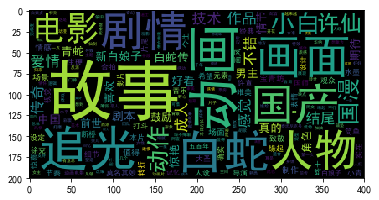

In [77]:
# 词云
word_cloud_filter = wordcloud.fit_words(word_frequence_filter)
plt.imshow(word_cloud_filter)